In [1]:
import pandas as pd

In [2]:
GPU = ["A100"]
MODEL = ["Llama-3-8B", "Llama-2-13B", "Granite-20B", "MPT-30B"]
KV_on_decode_total = [117.20, 190.45, 293.01, 439.52]
KV_off_decode_total = [58006.02, 94259.84, 145015.13, 300000.00]

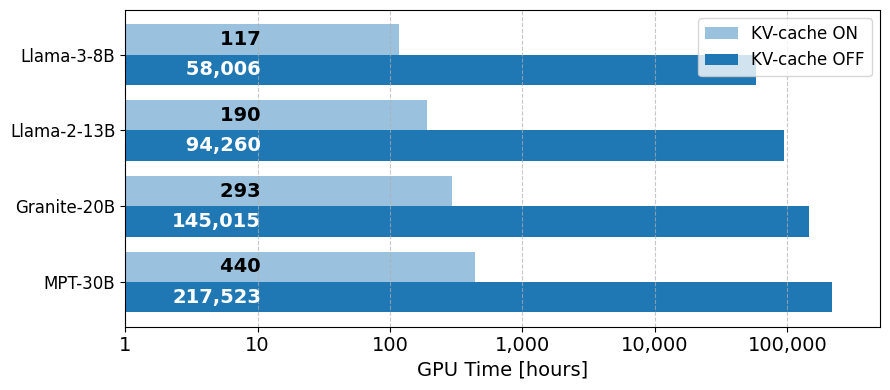

In [30]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.transforms as mtrans
from matplotlib.ticker import FuncFormatter, LogLocator, NullLocator   # ← add

models   = ["Llama-3-8B", "Llama-2-13B", "Granite-20B", "MPT-30B"]
kv_on_h  = np.array([117.20, 190.45, 293.01, 439.52])
kv_off_h = np.array([58006.02, 94259.84, 145015.13, 217522.70])

bar_h = 0.40
y_pos = np.arange(len(models))

fig, ax = plt.subplots(figsize=(9, 4))

bars_on  = ax.barh(y_pos - bar_h/2, kv_on_h,  bar_h,
                   color=plt.cm.tab10(0), alpha=0.45, label="KV-cache ON")
bars_off = ax.barh(y_pos + bar_h/2, kv_off_h, bar_h,
                   color=plt.cm.tab10(0), alpha=1.00, label="KV-cache OFF")

ax.set_xscale("log", base=10)
ax.xaxis.set_major_locator(LogLocator(base=10))
ax.xaxis.set_minor_locator(NullLocator())
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _ : f"{x:,.0f}"))
ax.tick_params(axis='x', which='major', labelsize=14)

ax.set_yticks(y_pos, models, fontsize=12)
ax.set_xlabel("GPU Time [hours]", fontsize=14)
ax.invert_yaxis()
ax.grid(axis="x", which="major", linestyle="--", alpha=0.7)
ax.legend(fontsize=12, loc="upper right")
ax.set_xlim(1, 500_000)

align_x  = 0.18
txt_trans = mtrans.blended_transform_factory(ax.transAxes, ax.transData)

for bar, val in zip(bars_on, kv_on_h):
    ax.text(align_x, bar.get_y() + bar.get_height()/2,
            f"{val:>7.0f}", transform=txt_trans, ha="right", va="center",
            color="black", fontweight="bold", fontsize=14)

for bar, val in zip(bars_off, kv_off_h):
    ax.text(align_x, bar.get_y() + bar.get_height()/2,
            f"{val:>7,.0f}", transform=txt_trans, ha="right", va="center",
            color="white", fontweight="bold", fontsize=14)

plt.tight_layout()
plt.savefig("figures/kv_cache_vs_prefill_time.pdf", dpi=300, bbox_inches="tight")
plt.show()


# OLD

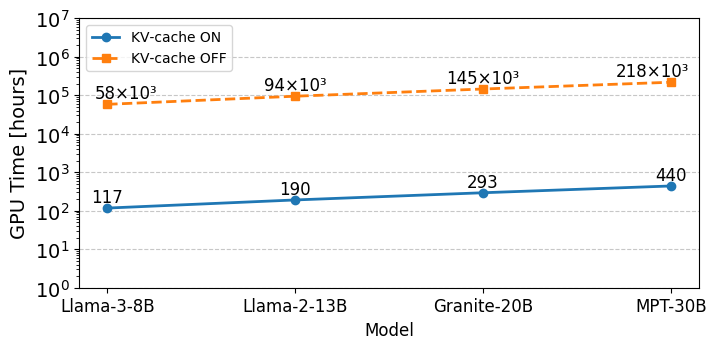

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Data
models = ["Llama-3-8B", "Llama-2-13B", "Granite-20B", "MPT-30B"]
kv_on_h  = np.array([117.20, 190.45, 293.01, 439.52])
kv_off_h = np.array([58006.02, 94259.84, 145015.13, 217522.70])
prefill_time = np.array([50.14, 81.06, 124.36, 186.20])

x = np.arange(len(models))

plt.figure(figsize=(8, 3.5))

plt.plot(x, kv_on_h,  marker="o", linestyle="-",  linewidth=2, label="KV‑cache ON")
plt.plot(x, kv_off_h, marker="s", linestyle="--", linewidth=2, label="KV‑cache OFF")


def fmt(y, _):
    return f"{y:,.0f}" if y >= 1_000 else f"{y:.0f}"
plt.gca().yaxis.set_major_formatter(FuncFormatter(fmt))

plt.yscale("log")
plt.xticks(x, models, fontsize=12)
plt.yticks(fontsize=14)
plt.ylabel("GPU Time [hours]", fontsize=14)
plt.ylim(1, 10**7)
plt.xlabel("Model", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=10, loc="upper left")


for xi, y in zip(x, kv_on_h):
    plt.text(xi, y*1.1, f"{y:,.0f}", ha="center", va="bottom", fontsize=12)

i = 0
for xi, y in zip(x, kv_off_h):
    if i == 0:
        plt.text(xi+0.1, y*1.1, f"{y/1000:,.0f}×10³", ha="center", va="bottom", fontsize=12)
    elif i == 3:
        plt.text(xi-0.1, y*1.1, f"{y/1000:,.0f}×10³", ha="center", va="bottom", fontsize=12)
    else:
        plt.text(xi, y*1.1, f"{y/1000:,.0f}×10³", ha="center", va="bottom", fontsize=12)
    i += 1

plt.savefig("figures/kv_cache_vs_prefill_time.pdf", dpi=300, bbox_inches='tight')

In [5]:
print("Total hours in data.csv is", pd.read_csv('data.csv')['total_h'].sum())

print("Total hours KV off from the plot is", sum([58006.02, 94259.84, 145015.13, 217522.70]))
print("Total years KV off from the plot is", sum([58006.02, 94259.84, 145015.13, 217522.70]) / (24 * 365))

print("Total hours KV on from the plot is", sum([117.20, 190.45, 293.01, 439.52]))
print("Total years KV on from the plot is", sum([117.20, 190.45, 293.01, 439.52]) / (24 * 365))

Total hours in data.csv is 516727.38999999996
Total hours KV off from the plot is 514803.69
Total years KV off from the plot is 58.76754452054794
Total hours KV on from the plot is 1040.1799999999998
Total years KV on from the plot is 0.11874200913242007
